In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

C:\Users\a1003\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\a1003\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\a1003\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### resize function

In [6]:
#data_path
#save_path
#new_folder
filemane = []
curr_path = os.getcwd() 
def resize_image(curr_path, data_path, new_folder, save_path, filemane):
    curr_path = curr_path
    os.chdir(curr_path + '\\food_recog')
    newpath = new_folder 
    if not os.path.exists(newpath):
        os.makedirs(newpath)
        
    os.chdir(data_path)    
    for i in range(len(os.listdir())):
        filemane.append(os.listdir()[i]) # os.listdir()[i] is the file we want
        image = Image.open(os.listdir()[i])
        resize_image = image.resize((190,200))
        resize_image.save(save_path + os.listdir()[i])

In [9]:
data_path = curr_path + '\\food_recog\\orange'
save_path = curr_path + '\\food_recog\\resize_orange\\'
new_folder = curr_path + '\\food_recog\\resize_orange'
resize_image(curr_path, data_path, new_folder, save_path, filemane)

### label_image

In [11]:
#resize_path
#target_name
inputs = []
targets = []
def label_image(resize_path, target_name):
    
    os.chdir(resize_path)
    for i in range(len(os.listdir())):    
        image = Image.open(os.listdir()[i])
        np_image = np.array(image)
        inputs.append(np_image)
        targets.append(target_name)

In [13]:
resize_path = curr_path + '\\food_recog\\resize_chili'
target_name = 'chili'
label_image(resize_path, target_name)

In [14]:
resize_path =  curr_path + '\\food_recog\\resize_tomato'
target_name = 'tomato'
label_image(resize_path, target_name)

In [15]:
resize_path =  curr_path + '\\food_recog\\resize_mushroom'
target_name = 'mushroom'
label_image(resize_path, target_name)

In [16]:
resize_path =  curr_path + '\\food_recog\\resize_banana'
target_name = 'banana'
label_image(resize_path, target_name)

In [17]:
resize_path =  curr_path + '\\food_recog\\resize_cucumber'
target_name = 'cucumber'
label_image(resize_path, target_name)

In [18]:
resize_path =  curr_path + '\\food_recog\\resize_ginger'
target_name = 'ginger'
label_image(resize_path, target_name)

In [19]:
resize_path =  curr_path + '\\food_recog\\resize_green_onion'
target_name = 'green_onion'
label_image(resize_path, target_name)

In [20]:
resize_path =  curr_path + '\\food_recog\\resize_garlic'
target_name = 'garlic'
label_image(resize_path, target_name)

In [21]:
resize_path =  curr_path + '\\food_recog\\resize_shallots'
target_name = 'shallots'
label_image(resize_path, target_name)

In [22]:
resize_path =  curr_path + '\\food_recog\\resize_apple'
target_name = 'apple'
label_image(resize_path, target_name)

In [23]:
resize_path =  curr_path + '\\food_recog\\resize_orange'
target_name = 'orange'
label_image(resize_path, target_name)

In [24]:
inputs_data = np.array(inputs)
targets_data = np.array(targets)

In [25]:
inputs_data.shape

(1057, 200, 190, 3)

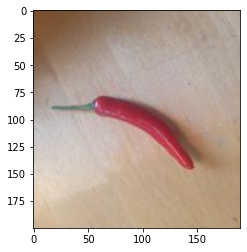

In [26]:
import matplotlib.pyplot as plt
plt.imshow(inputs_data[1,:,:,:])

In [27]:
targets_data[1]

'chili'

### image processing class

In [21]:
class image_process(object):
    

    def __init__(self, inputs_data, targets_data):
        self.whole_inputs = np.array(inputs_data)
        self.whole_targets = np.array(targets_data)
        self.red_inputs = np.array(inputs_data)[:,:,:,:1]
        self.green_inputs = np.array(inputs_data)[:,:,:,1:2]
        self.blue_inputs = np.array(inputs_data)[:,:,:,2:3]
    
    def red_pic(self):
        
        red = self.whole_inputs
        red[:,:,:,1:2] = 0
        red[:,:,:,2:3] = 0
        
        return red
    
    def green_pic(self):    
        
        green = self.whole_inputs
        green[:,:,:,:1] = 0
        green[:,:,:,2:3] = 0
        
        return green
    
    def blue_pic(self):
        
        blue = self.whole_inputs
        blue[:,:,:,:1] = 0
        blue[:,:,:,1:2] = 0
        
        return blue
        

### shuffle data

In [22]:
from sklearn.utils import shuffle

In [23]:
inputs_data, targets_data = shuffle(inputs_data, targets_data)

In [24]:
#inputs_data[2,:,:,:]

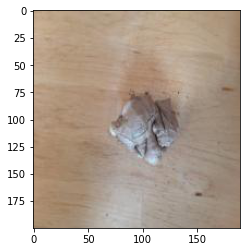

In [25]:
plt.imshow(inputs_data[2,:,:,:])

In [26]:
targets_data[2]

'ginger'

### Dimensional reduction

In [27]:
from sklearn.decomposition import PCA
reshape_inputs_data = inputs_data.reshape((inputs_data.shape[0], inputs_data.shape[1]*inputs_data.shape[2]*inputs_data.shape[3]))

pca = PCA(0.95)
reduction_inputs = pca.fit_transform(reshape_inputs_data)

In [28]:
#inputs_data.shape

In [29]:
#inputs_data[1,:,:,:]

In [30]:
#reduction_inputs.shape

### Split data

In [31]:
proportion = 0.8
number_training = int(0.8*(reduction_inputs.shape[0]))

x_train, x_test, y_train, y_test = reduction_inputs[:number_training], reduction_inputs[number_training:], targets_data[:number_training], targets_data[number_training:]

In [32]:
x_train.shape

(773, 192)

# Deep Learning

### To prevent vanishing/exploding gradients problems and neuron die: 

#### 1. Utilize different initialization stategy (Xavier initialization or Glorot initialization or LeCun initialization)
#### 2. Try different activation function: ( SELU > ELU > LeakyReLU > ReLU > tanh > logistic)
#### 3. Batch Normalization: zero-centers and normalizes each each layer's inputs
#### 4. Gradient Clipping: Clip every component of the gradient vector to the value between -1 and 1 (prevent exploding gradients)

### Other techniques to improve learning model: 

#### 1. Pretrain the data (reusing pretrain layers, unsupervised pretraining and pretrain on an auxiliary task.

### Speed up the training: 

#### 1. Good initialization strategy
#### 2. Good activation function
#### 3. Batch Normalization
#### 4. Pretrain the model
#### 5. Faster optimizer

In [33]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [34]:
inputs_tr = x_train
inputs_te = x_test

In [35]:
train_df = pd.DataFrame(y_train, columns = ["targets"])
targets_tr = np.array(pd.get_dummies(train_df)).astype("float32")

test_df = pd.DataFrame(y_test, columns = ["targets"])
targets_te = np.array(pd.get_dummies(test_df)).astype("float32")

In [39]:
def model_ann_selu_relu(inputs_size, outputs_size, n_layers, n_neurons, lr, kernel_init, active_function):
    model_ann = tf.keras.Sequential()
    
    model_ann.add(tf.keras.layers.Flatten(input_shape = inputs_size)) ### inputs layers
    for i in range(n_layers):
        model_ann.add(tf.keras.layers.Dense(n_neurons, activation = active_function, kernel_initializer = kernel_init))
    
    model_ann.add(tf.keras.layers.Dense(outputs_size, activation = "softmax")) ### outputs layers
    
    
    opt = tf.keras.optimizers.SGD(lr = lr)
    model_ann.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])
    
    return model_ann

In [42]:
def model_ann_leakyrelu(inputs_size, outputs_size, n_layers, n_neurons, lr, kernel_init):
    model_ann = tf.keras.Sequential()
    
    model_ann.add(tf.keras.layers.Flatten(input_shape = inputs_size)) ### inputs layers
    for i in range(n_layers):
        model_ann.add(tf.keras.layers.Dense(n_neurons, kernel_initializer = kernel_init))
        model_ann.add(tf.keras.layers.LeakyReLU())
    
    model_ann.add(tf.keras.layers.Dense(outputs_size, activation = "softmax")) ### outputs layers
    
    
    opt = tf.keras.optimizers.SGD(lr = lr)
    model_ann.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

    return model_ann
    

In [43]:
model_1 = model_ann_leakyrelu(inputs_size = [inputs_tr.shape[1]], outputs_size = targets_tr.shape[1], n_layers = 15, n_neurons = 100, lr = 0.0001, kernel_init = "he_normal")

C:\Users\a1003\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [44]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               19300     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 100)              

In [45]:
std = StandardScaler()
std_inputs_tr = inputs_tr / 255

std = StandardScaler()
std_inputs_te = inputs_te / 255


In [46]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience = 10)
model_1.fit(std_inputs_tr, targets_tr, validation_data = (std_inputs_te, targets_te), epochs = 200, callbacks = [early_stop_cb])

Epoch 1/200
25/25 [==============================] - 1s 14ms/step - loss: 10.1920 - accuracy: 0.1255 - val_loss: 5.9357 - val_accuracy: 0.1443
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 4.8101 - accuracy: 0.1630 - val_loss: 4.0670 - val_accuracy: 0.1546
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 3.5286 - accuracy: 0.2135 - val_loss: 3.3177 - val_accuracy: 0.2113
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 2.8999 - accuracy: 0.2717 - val_loss: 2.9623 - val_accuracy: 0.2268
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 2.5512 - accuracy: 0.3273 - val_loss: 2.6517 - val_accuracy: 0.2680
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 2.3106 - accuracy: 0.3661 - val_loss: 2.4913 - val_accuracy: 0.2732
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 2.1330 - accuracy: 0.4010 - val_loss: 2.3277 - val_accuracy: 0.3196
Epoch 8/200

Epoch 59/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.9069 - val_loss: 0.8627 - val_accuracy: 0.7474
Epoch 60/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.9043 - val_loss: 0.8526 - val_accuracy: 0.7526
Epoch 61/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.9120 - val_loss: 0.8667 - val_accuracy: 0.7629
Epoch 62/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.9082 - val_loss: 0.8502 - val_accuracy: 0.7577
Epoch 63/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.9107 - val_loss: 0.8457 - val_accuracy: 0.7629
Epoch 64/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.9120 - val_loss: 0.8415 - val_accuracy: 0.7577
Epoch 65/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.9094 - val_loss: 0.8378 - val_accuracy: 0.7629
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9961 - val_loss: 0.5842 - val_accuracy: 0.8660
Epoch 174/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9961 - val_loss: 0.5801 - val_accuracy: 0.8660
Epoch 175/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9961 - val_loss: 0.5792 - val_accuracy: 0.8660
Epoch 176/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9961 - val_loss: 0.5770 - val_accuracy: 0.8660
Epoch 177/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9961 - val_loss: 0.5773 - val_accuracy: 0.8660
Epoch 178/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9961 - val_loss: 0.5735 - val_accuracy: 0.8660
Epoch 179/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9961 - val_loss: 0.5729 - val_accuracy: 0.8660
Epoch 180/200

### RandomizedSearch

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
keras_model = tf.keras.wrappers.scikit_learn.KerasRegressor(model_ann_selu_relu)

In [150]:
### model_ann_selu_relu(inputs_size, outputs_size, n_layers, n_neurons, lr, kernel_init, active_function):
### model_ann_leakyrelu(inputs_size, outputs_size, n_layers, n_neurons, lr, kernel_init)


search_para = { "inputs_size" : [[inputs_tr.shape[1]]], "outputs_size" : [targets_tr.shape[1]], 
              "n_layers":[15,20,30,40], "n_neurons":[50,100,200,300], "lr":[0.1, 0.01, 0.001,0.0001, 0.00001, 0.000001],
              "kernel_init":['he_normal', 'lecum_normal'], 'active_function':['selu', 'relu']}
rnd_search_cv = RandomizedSearchCV(keras_model, search_para, cv = 10)



In [151]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience = 10)
rnd_search_cv.fit(std_inputs_tr, targets_tr, validation_data = (std_inputs_te, targets_te), epochs = 200, callbacks = [early_stop_cb])

Train on 583 samples, validate on 162 samples
Epoch 1/200
583/583 [==============================]583/583 [==============================] - 3s 6ms/step - loss: 2.1746 - acc: 0.1321 - val_loss: 2.1497 - val_acc: 0.1543 ETA: 1s - loss: 2.1691 - acc:

Epoch 2/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1950 - acc: 0.1286 - val_loss: 2.2042 - val_acc: 0.0988 ETA: 0s - loss: 2.1926 - ac

Epoch 3/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1936 - acc: 0.1218 - val_loss: 2.1982 - val_acc: 0.1235

Epoch 4/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1687 - acc: 0.1492 - val_loss: 2.0521 - val_acc: 0.2037

Epoch 5/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.2053 - acc: 0.1458 - val_loss: 2.2000 - val_acc: 0.1235

Epoch 6/200
583/583 [=====


Epoch 28/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1989 - acc: 0.1424 - val_loss: 2.2058 - val_acc: 0.1543

Epoch 29/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1901 - acc: 0.1527 - val_loss: 2.1861 - val_acc: 0.1543

Epoch 30/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1590 - acc: 0.1904 - val_loss: 2.1753 - val_acc: 0.2222

65/65 [==============================]65/65 [==============================] - 0s 590us/step

Train on 583 samples, validate on 162 samples
Epoch 1/200
583/583 [==============================]583/583 [==============================] - 4s 6ms/step - loss: 2.1694 - acc: 0.1218 - val_loss: 2.1865 - val_acc: 0.1235

Epoch 2/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 2.1936 - acc: 0.1304 - val_loss: 2.2062 - val

583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.3587 - acc: 0.4014 - val_loss: 3.3520 - val_acc: 0.2346

Epoch 45/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.9199 - acc: 0.2624 - val_loss: 1.2347 - val_acc: 0.5000

Epoch 46/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.2546 - acc: 0.4288 - val_loss: 1.1779 - val_acc: 0.4383

Epoch 47/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.4493 - acc: 0.3533 - val_loss: 1.1004 - val_acc: 0.4938

Epoch 48/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.2845 - acc: 0.3756 - val_loss: 1.3201 - val_acc: 0.3580

Epoch 49/200
583/583 [==============================]583/583 [==============================] - 1s 2ms/step - loss: 1.2684 - acc: 0.3911 -

583/583 [==============================]583/583 [==============================] - 0s 688us/step - loss: 2.1343 - acc: 0.2727 - val_loss: 1.5329 - val_acc: 0.4568

Epoch 39/200
583/583 [==============================]583/583 [==============================] - 0s 716us/step - loss: 1.7084 - acc: 0.3465 - val_loss: 2.1400 - val_acc: 0.2037

Epoch 40/200
583/583 [==============================]583/583 [==============================] - 0s 701us/step - loss: 2.0556 - acc: 0.1887 - val_loss: 2.4438 - val_acc: 0.1111

Epoch 41/200
583/583 [==============================]583/583 [==============================] - 0s 654us/step - loss: 1.8459 - acc: 0.2539 - val_loss: 5.2610 - val_acc: 0.0370

Epoch 42/200
583/583 [==============================]583/583 [==============================] - 0s 634us/step - loss: 2.0867 - acc: 0.2196 - val_loss: 1.8839 - val_acc: 0.2099

Epoch 43/200
583/583 [==============================]583/583 [==============================] - 0s 653us/step - loss: 1.7503 - a

C:\Users\a1003\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a1003\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a1003\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\_impl\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-133-0e22e4ed6ba9>", line 6, in model_ann_selu_relu
    model_ann.add(tf.keras.layers.Dense(n_neurons, activation = active_function, kernel_initializer = kernel_init))
  File "C:\Users\a1003\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\_impl\keras\layers\core.py", line 780, in __init__
    kernel_initializ

Train on 583 samples, validate on 162 samples
Epoch 1/200
583/583 [==============================]583/583 [==============================] - 2s 3ms/step - loss: 2.2626 - acc: 0.1355 - val_loss: 2.1985 - val_acc: 0.1543

Epoch 2/200
583/583 [==============================]583/583 [==============================] - 0s 518us/step - loss: 2.2578 - acc: 0.1355 - val_loss: 2.1957 - val_acc: 0.1543

Epoch 3/200
583/583 [==============================]583/583 [==============================] - 0s 538us/step - loss: 2.2537 - acc: 0.1355 - val_loss: 2.1931 - val_acc: 0.1543

Epoch 4/200
583/583 [==============================]583/583 [==============================] - 0s 533us/step - loss: 2.2499 - acc: 0.1355 - val_loss: 2.1906 - val_acc: 0.1543

Epoch 5/200
583/583 [==============================]583/583 [==============================] - 0s 465us/step - loss: 2.2464 - acc: 0.1355 - val_loss: 2.1886 - val_acc: 0.1543

Epoch 6/200
583/583 [==============================]583/583 [===============


Epoch 47/200
583/583 [==============================]583/583 [==============================] - 0s 517us/step - loss: 2.1853 - acc: 0.1372 - val_loss: 2.1602 - val_acc: 0.1543

Epoch 48/200
583/583 [==============================]583/583 [==============================] - 0s 487us/step - loss: 2.1846 - acc: 0.1372 - val_loss: 2.1599 - val_acc: 0.1543

Epoch 49/200
583/583 [==============================]583/583 [==============================] - 0s 635us/step - loss: 2.1840 - acc: 0.1372 - val_loss: 2.1594 - val_acc: 0.1543

Epoch 50/200
583/583 [==============================]583/583 [==============================] - 0s 588us/step - loss: 2.1834 - acc: 0.1372 - val_loss: 2.1590 - val_acc: 0.1543

Epoch 51/200
583/583 [==============================]583/583 [==============================] - 0s 594us/step - loss: 2.1828 - acc: 0.1372 - val_loss: 2.1587 - val_acc: 0.1543

Epoch 52/200
583/583 [==============================]583/583 [==============================] - 0s 607us/step - lo


Epoch 139/200
583/583 [==============================]583/583 [==============================] - 0s 471us/step - loss: 2.1391 - acc: 0.1578 - val_loss: 2.1236 - val_acc: 0.1852

Epoch 140/200
583/583 [==============================]583/583 [==============================] - 0s 517us/step - loss: 2.1385 - acc: 0.1578 - val_loss: 2.1231 - val_acc: 0.1852

Epoch 141/200
583/583 [==============================]583/583 [==============================] - 0s 570us/step - loss: 2.1379 - acc: 0.1578 - val_loss: 2.1226 - val_acc: 0.1852

Epoch 142/200
583/583 [==============================]583/583 [==============================] - 0s 633us/step - loss: 2.1373 - acc: 0.1578 - val_loss: 2.1221 - val_acc: 0.1914

Epoch 143/200
583/583 [==============================]583/583 [==============================] - 0s 551us/step - loss: 2.1367 - acc: 0.1578 - val_loss: 2.1215 - val_acc: 0.1914

Epoch 144/200
583/583 [==============================]583/583 [==============================] - 0s 498us/ste


Epoch 185/200
583/583 [==============================]583/583 [==============================] - 0s 511us/step - loss: 2.1070 - acc: 0.1904 - val_loss: 2.0930 - val_acc: 0.2407

Epoch 186/200
583/583 [==============================]583/583 [==============================] - 0s 519us/step - loss: 2.1062 - acc: 0.1904 - val_loss: 2.0922 - val_acc: 0.2407

Epoch 187/200
583/583 [==============================]583/583 [==============================] - 0s 565us/step - loss: 2.1054 - acc: 0.1921 - val_loss: 2.0915 - val_acc: 0.2407

Epoch 188/200
583/583 [==============================]583/583 [==============================] - 0s 514us/step - loss: 2.1045 - acc: 0.1921 - val_loss: 2.0907 - val_acc: 0.2407

Epoch 189/200
583/583 [==============================]583/583 [==============================] - 0s 508us/step - loss: 2.1037 - acc: 0.1938 - val_loss: 2.0899 - val_acc: 0.2407

Epoch 190/200
583/583 [==============================]583/583 [==============================] - 0s 519us/ste

583/583 [==============================]583/583 [==============================] - 0s 518us/step - loss: 2.1750 - acc: 0.1973 - val_loss: 2.1763 - val_acc: 0.2037

Epoch 77/200
583/583 [==============================]583/583 [==============================] - 0s 516us/step - loss: 2.1742 - acc: 0.1973 - val_loss: 2.1758 - val_acc: 0.2037

Epoch 78/200
583/583 [==============================]583/583 [==============================] - 0s 558us/step - loss: 2.1735 - acc: 0.1955 - val_loss: 2.1751 - val_acc: 0.2037

Epoch 79/200
583/583 [==============================]583/583 [==============================] - 0s 592us/step - loss: 2.1727 - acc: 0.1938 - val_loss: 2.1745 - val_acc: 0.2037

Epoch 80/200
583/583 [==============================]583/583 [==============================] - 0s 588us/step - loss: 2.1720 - acc: 0.1955 - val_loss: 2.1739 - val_acc: 0.2037

Epoch 81/200
583/583 [==============================]583/583 [==============================] - 0s 559us/step - loss: 2.1712 - a

583/583 [==============================]583/583 [==============================] - 0s 485us/step - loss: 2.1425 - acc: 0.2230 - val_loss: 2.1475 - val_acc: 0.2407

Epoch 123/200
583/583 [==============================]583/583 [==============================] - 0s 522us/step - loss: 2.1417 - acc: 0.2230 - val_loss: 2.1468 - val_acc: 0.2407

Epoch 124/200
583/583 [==============================]583/583 [==============================] - 0s 547us/step - loss: 2.1410 - acc: 0.2247 - val_loss: 2.1461 - val_acc: 0.2407

Epoch 125/200
583/583 [==============================]583/583 [==============================] - 0s 572us/step - loss: 2.1403 - acc: 0.2230 - val_loss: 2.1454 - val_acc: 0.2407

Epoch 126/200
583/583 [==============================]583/583 [==============================] - 0s 543us/step - loss: 2.1395 - acc: 0.2230 - val_loss: 2.1448 - val_acc: 0.2407

Epoch 127/200
583/583 [==============================]583/583 [==============================] - 0s 541us/step - loss: 2.138

583/583 [==============================]583/583 [==============================] - 0s 503us/step - loss: 2.1833 - acc: 0.1938 - val_loss: 2.1618 - val_acc: 0.1975

Epoch 14/200
583/583 [==============================]583/583 [==============================] - 0s 478us/step - loss: 2.1821 - acc: 0.1887 - val_loss: 2.1608 - val_acc: 0.1975

Epoch 15/200
583/583 [==============================]583/583 [==============================] - 0s 530us/step - loss: 2.1809 - acc: 0.1904 - val_loss: 2.1596 - val_acc: 0.2099

Epoch 16/200
583/583 [==============================]583/583 [==============================] - 0s 575us/step - loss: 2.1797 - acc: 0.1990 - val_loss: 2.1584 - val_acc: 0.2037

Epoch 17/200
583/583 [==============================]583/583 [==============================] - 0s 540us/step - loss: 2.1784 - acc: 0.2024 - val_loss: 2.1573 - val_acc: 0.2037

Epoch 18/200
583/583 [==============================]583/583 [==============================] - 0s 494us/step - loss: 2.1772 - a

583/583 [==============================]583/583 [==============================] - 0s 522us/step - loss: 2.0580 - acc: 0.1595 - val_loss: 2.0612 - val_acc: 0.1728

Epoch 106/200
583/583 [==============================]583/583 [==============================] - 0s 571us/step - loss: 2.0563 - acc: 0.1612 - val_loss: 2.0599 - val_acc: 0.1728

Epoch 107/200
583/583 [==============================]583/583 [==============================] - 0s 544us/step - loss: 2.0547 - acc: 0.1647 - val_loss: 2.0584 - val_acc: 0.1728

Epoch 108/200
583/583 [==============================]583/583 [==============================] - 0s 487us/step - loss: 2.0529 - acc: 0.1647 - val_loss: 2.0570 - val_acc: 0.1790

Epoch 109/200
583/583 [==============================]583/583 [==============================] - 0s 570us/step - loss: 2.0512 - acc: 0.1681 - val_loss: 2.0555 - val_acc: 0.1790

Epoch 110/200
583/583 [==============================]583/583 [==============================] - 0s 573us/step - loss: 2.049

583/583 [==============================]583/583 [==============================] - 0s 489us/step - loss: 1.8286 - acc: 0.3533 - val_loss: 1.8604 - val_acc: 0.3333

Epoch 196/200
583/583 [==============================]583/583 [==============================] - 0s 583us/step - loss: 1.8244 - acc: 0.3499 - val_loss: 1.8575 - val_acc: 0.3272

Epoch 197/200
583/583 [==============================]583/583 [==============================] - 0s 559us/step - loss: 1.8205 - acc: 0.3551 - val_loss: 1.8536 - val_acc: 0.3333

Epoch 198/200
583/583 [==============================]583/583 [==============================] - 0s 486us/step - loss: 1.8163 - acc: 0.3533 - val_loss: 1.8510 - val_acc: 0.3395

Epoch 199/200
583/583 [==============================]583/583 [==============================] - 0s 540us/step - loss: 1.8121 - acc: 0.3551 - val_loss: 1.8470 - val_acc: 0.3395

Epoch 200/200
583/583 [==============================]583/583 [==============================] - 0s 621us/step - loss: 1.808


Epoch 86/200
583/583 [==============================]583/583 [==============================] - 0s 624us/step - loss: 2.1627 - acc: 0.1115 - val_loss: 2.1793 - val_acc: 0.1111

Epoch 87/200
583/583 [==============================]583/583 [==============================] - 0s 505us/step - loss: 2.1621 - acc: 0.1115 - val_loss: 2.1787 - val_acc: 0.1111

Epoch 88/200
583/583 [==============================]583/583 [==============================] - 0s 498us/step - loss: 2.1614 - acc: 0.1132 - val_loss: 2.1782 - val_acc: 0.1111

Epoch 89/200
583/583 [==============================]583/583 [==============================] - 0s 555us/step - loss: 2.1608 - acc: 0.1166 - val_loss: 2.1776 - val_acc: 0.1111

Epoch 90/200
583/583 [==============================]583/583 [==============================] - 0s 518us/step - loss: 2.1602 - acc: 0.1166 - val_loss: 2.1770 - val_acc: 0.1111

Epoch 91/200
583/583 [==============================]583/583 [==============================] - 0s 512us/step - lo

583/583 [==============================]583/583 [==============================] - 0s 577us/step - loss: 2.0927 - acc: 0.1527 - val_loss: 2.1140 - val_acc: 0.1420TA: 0s - loss: 2.0926 - acc: 0.154

Epoch 176/200
583/583 [==============================]583/583 [==============================] - 0s 472us/step - loss: 2.0916 - acc: 0.1544 - val_loss: 2.1130 - val_acc: 0.1420

Epoch 177/200
583/583 [==============================]583/583 [==============================] - 0s 506us/step - loss: 2.0904 - acc: 0.1561 - val_loss: 2.1120 - val_acc: 0.1481

Epoch 178/200
583/583 [==============================]583/583 [==============================] - 0s 488us/step - loss: 2.0893 - acc: 0.1578 - val_loss: 2.1110 - val_acc: 0.1481

Epoch 179/200
583/583 [==============================]583/583 [==============================] - 0s 562us/step - loss: 2.0881 - acc: 0.1578 - val_loss: 2.1098 - val_acc: 0.1481

Epoch 180/200
583/583 [==============================]583/583 [===========================


Epoch 20/200
583/583 [==============================]583/583 [==============================] - 0s 481us/step - loss: 2.1648 - acc: 0.1012 - val_loss: 2.1481 - val_acc: 0.1481

Epoch 21/200
583/583 [==============================]583/583 [==============================] - 0s 529us/step - loss: 2.1637 - acc: 0.1012 - val_loss: 2.1471 - val_acc: 0.1481

Epoch 22/200
583/583 [==============================]583/583 [==============================] - 0s 533us/step - loss: 2.1626 - acc: 0.1012 - val_loss: 2.1461 - val_acc: 0.1481

Epoch 23/200
583/583 [==============================]583/583 [==============================] - 0s 570us/step - loss: 2.1616 - acc: 0.1012 - val_loss: 2.1450 - val_acc: 0.1481

Epoch 24/200
583/583 [==============================]583/583 [==============================] - 0s 544us/step - loss: 2.1606 - acc: 0.1012 - val_loss: 2.1440 - val_acc: 0.1481

Epoch 25/200
583/583 [==============================]583/583 [==============================] - 0s 513us/step - lo

583/583 [==============================]583/583 [==============================] - 0s 529us/step - loss: 2.0615 - acc: 0.1990 - val_loss: 2.0496 - val_acc: 0.2531

Epoch 112/200
583/583 [==============================]583/583 [==============================] - 0s 483us/step - loss: 2.0600 - acc: 0.2007 - val_loss: 2.0483 - val_acc: 0.2531

Epoch 113/200
583/583 [==============================]583/583 [==============================] - 0s 491us/step - loss: 2.0585 - acc: 0.2007 - val_loss: 2.0467 - val_acc: 0.2531

Epoch 114/200
583/583 [==============================]583/583 [==============================] - 0s 585us/step - loss: 2.0569 - acc: 0.2110 - val_loss: 2.0452 - val_acc: 0.2531

Epoch 115/200
583/583 [==============================]583/583 [==============================] - 0s 498us/step - loss: 2.0553 - acc: 0.2110 - val_loss: 2.0437 - val_acc: 0.2531

Epoch 116/200
583/583 [==============================]583/583 [==============================] - 0s 483us/step - loss: 2.053


Epoch 2/200
583/583 [==============================]583/583 [==============================] - 0s 613us/step - loss: 2.3400 - acc: 0.1492 - val_loss: 2.3016 - val_acc: 0.1420

Epoch 3/200
583/583 [==============================]583/583 [==============================] - 0s 571us/step - loss: 2.3253 - acc: 0.1509 - val_loss: 2.2893 - val_acc: 0.1481

Epoch 4/200
583/583 [==============================]583/583 [==============================] - 0s 489us/step - loss: 2.3126 - acc: 0.1509 - val_loss: 2.2786 - val_acc: 0.1481

Epoch 5/200
583/583 [==============================]583/583 [==============================] - 0s 598us/step - loss: 2.3021 - acc: 0.1544 - val_loss: 2.2698 - val_acc: 0.1481

Epoch 6/200
583/583 [==============================]583/583 [==============================] - 0s 544us/step - loss: 2.2930 - acc: 0.1544 - val_loss: 2.2621 - val_acc: 0.1420TA: 0s - loss: 2.3160 - acc: 0.

Epoch 7/200
583/583 [==============================]583/583 [===========================

583/583 [==============================]583/583 [==============================] - 0s 488us/step - loss: 2.1313 - acc: 0.2075 - val_loss: 2.1232 - val_acc: 0.1975

Epoch 94/200
583/583 [==============================]583/583 [==============================] - 0s 597us/step - loss: 2.1302 - acc: 0.2075 - val_loss: 2.1221 - val_acc: 0.1975

Epoch 95/200
583/583 [==============================]583/583 [==============================] - 0s 516us/step - loss: 2.1291 - acc: 0.2075 - val_loss: 2.1209 - val_acc: 0.1975

Epoch 96/200
583/583 [==============================]583/583 [==============================] - 0s 613us/step - loss: 2.1280 - acc: 0.2075 - val_loss: 2.1198 - val_acc: 0.1975

Epoch 97/200
583/583 [==============================]583/583 [==============================] - 0s 533us/step - loss: 2.1268 - acc: 0.2075 - val_loss: 2.1187 - val_acc: 0.1975

Epoch 98/200
583/583 [==============================]583/583 [==============================] - 0s 566us/step - loss: 2.1258 - a


Epoch 184/200
583/583 [==============================]583/583 [==============================] - 0s 508us/step - loss: 1.9948 - acc: 0.3208 - val_loss: 1.9896 - val_acc: 0.3272

Epoch 185/200
583/583 [==============================]583/583 [==============================] - 0s 503us/step - loss: 1.9925 - acc: 0.3208 - val_loss: 1.9875 - val_acc: 0.3210

Epoch 186/200
583/583 [==============================]583/583 [==============================] - 0s 497us/step - loss: 1.9903 - acc: 0.3190 - val_loss: 1.9855 - val_acc: 0.3210

Epoch 187/200
583/583 [==============================]583/583 [==============================] - 0s 573us/step - loss: 1.9880 - acc: 0.3208 - val_loss: 1.9835 - val_acc: 0.3210

Epoch 188/200
583/583 [==============================]583/583 [==============================] - 0s 487us/step - loss: 1.9858 - acc: 0.3242 - val_loss: 1.9812 - val_acc: 0.3272

Epoch 189/200
583/583 [==============================]583/583 [==============================] - 0s 549us/ste


Epoch 29/200
583/583 [==============================]583/583 [==============================] - 0s 504us/step - loss: 2.1630 - acc: 0.1252 - val_loss: 2.1585 - val_acc: 0.1481

Epoch 30/200
583/583 [==============================]583/583 [==============================] - 0s 550us/step - loss: 2.1623 - acc: 0.1252 - val_loss: 2.1581 - val_acc: 0.1481

Epoch 31/200
583/583 [==============================]583/583 [==============================] - 0s 533us/step - loss: 2.1617 - acc: 0.1252 - val_loss: 2.1577 - val_acc: 0.1481

Epoch 32/200
583/583 [==============================]583/583 [==============================] - 0s 496us/step - loss: 2.1610 - acc: 0.1252 - val_loss: 2.1573 - val_acc: 0.1481

Epoch 33/200
583/583 [==============================]583/583 [==============================] - 0s 533us/step - loss: 2.1604 - acc: 0.1252 - val_loss: 2.1569 - val_acc: 0.1481

Epoch 34/200
583/583 [==============================]583/583 [==============================] - 0s 637us/step - lo


Epoch 75/200
583/583 [==============================]583/583 [==============================] - 0s 481us/step - loss: 2.1342 - acc: 0.1269 - val_loss: 2.1393 - val_acc: 0.1481

Epoch 76/200
583/583 [==============================]583/583 [==============================] - 0s 484us/step - loss: 2.1336 - acc: 0.1269 - val_loss: 2.1389 - val_acc: 0.1481

Epoch 77/200
583/583 [==============================]583/583 [==============================] - 0s 481us/step - loss: 2.1330 - acc: 0.1269 - val_loss: 2.1384 - val_acc: 0.1481

Epoch 78/200
583/583 [==============================]583/583 [==============================] - 0s 553us/step - loss: 2.1324 - acc: 0.1269 - val_loss: 2.1379 - val_acc: 0.1481

Epoch 79/200
583/583 [==============================]583/583 [==============================] - 0s 576us/step - loss: 2.1318 - acc: 0.1269 - val_loss: 2.1375 - val_acc: 0.1481

Epoch 80/200
583/583 [==============================]583/583 [==============================] - 0s 541us/step - lo


Epoch 121/200
583/583 [==============================]583/583 [==============================] - 0s 571us/step - loss: 2.1030 - acc: 0.1355 - val_loss: 2.1166 - val_acc: 0.1543

Epoch 122/200
583/583 [==============================]583/583 [==============================] - 0s 502us/step - loss: 2.1023 - acc: 0.1389 - val_loss: 2.1160 - val_acc: 0.1543

Epoch 123/200
583/583 [==============================]583/583 [==============================] - 0s 626us/step - loss: 2.1015 - acc: 0.1372 - val_loss: 2.1154 - val_acc: 0.1605

Epoch 124/200
583/583 [==============================]583/583 [==============================] - 0s 611us/step - loss: 2.1008 - acc: 0.1407 - val_loss: 2.1148 - val_acc: 0.1605

Epoch 125/200
583/583 [==============================]583/583 [==============================] - 0s 542us/step - loss: 2.1000 - acc: 0.1424 - val_loss: 2.1142 - val_acc: 0.1605

Epoch 126/200
583/583 [==============================]583/583 [==============================] - 0s 546us/ste


Epoch 167/200
583/583 [==============================]583/583 [==============================] - 0s 554us/step - loss: 2.0626 - acc: 0.2384 - val_loss: 2.0831 - val_acc: 0.2284

Epoch 168/200
583/583 [==============================]583/583 [==============================] - 0s 524us/step - loss: 2.0615 - acc: 0.2401 - val_loss: 2.0824 - val_acc: 0.2346

Epoch 169/200
583/583 [==============================]583/583 [==============================] - 0s 515us/step - loss: 2.0604 - acc: 0.2436 - val_loss: 2.0815 - val_acc: 0.2346

Epoch 170/200
583/583 [==============================]583/583 [==============================] - 0s 542us/step - loss: 2.0593 - acc: 0.2436 - val_loss: 2.0807 - val_acc: 0.2346TA: 0s - loss: 2.0572 - acc: 0.24

Epoch 171/200
583/583 [==============================]583/583 [==============================] - 0s 480us/step - loss: 2.0582 - acc: 0.2436 - val_loss: 2.0798 - val_acc: 0.2346

Epoch 172/200
583/583 [==============================]583/583 [=============

583/583 [==============================]583/583 [==============================] - 0s 651us/step - loss: 2.1488 - acc: 0.1904 - val_loss: 2.1807 - val_acc: 0.1358

Epoch 58/200
583/583 [==============================]583/583 [==============================] - 0s 589us/step - loss: 2.1480 - acc: 0.1904 - val_loss: 2.1799 - val_acc: 0.1420

Epoch 59/200
583/583 [==============================]583/583 [==============================] - 0s 523us/step - loss: 2.1472 - acc: 0.1887 - val_loss: 2.1791 - val_acc: 0.1420

Epoch 60/200
583/583 [==============================]583/583 [==============================] - 0s 603us/step - loss: 2.1464 - acc: 0.1887 - val_loss: 2.1784 - val_acc: 0.1420

Epoch 61/200
583/583 [==============================]583/583 [==============================] - 0s 575us/step - loss: 2.1456 - acc: 0.1921 - val_loss: 2.1776 - val_acc: 0.1420

Epoch 62/200
583/583 [==============================]583/583 [==============================] - 0s 598us/step - loss: 2.1448 - a


Epoch 103/200
583/583 [==============================]583/583 [==============================] - 0s 496us/step - loss: 2.1105 - acc: 0.2127 - val_loss: 2.1451 - val_acc: 0.1605

Epoch 104/200
583/583 [==============================]583/583 [==============================] - 0s 454us/step - loss: 2.1095 - acc: 0.2110 - val_loss: 2.1444 - val_acc: 0.1605

Epoch 105/200
583/583 [==============================]583/583 [==============================] - 0s 506us/step - loss: 2.1086 - acc: 0.2058 - val_loss: 2.1435 - val_acc: 0.1667

Epoch 106/200
583/583 [==============================]583/583 [==============================] - 0s 632us/step - loss: 2.1077 - acc: 0.2041 - val_loss: 2.1427 - val_acc: 0.1667

Epoch 107/200
583/583 [==============================]583/583 [==============================] - 0s 513us/step - loss: 2.1068 - acc: 0.2058 - val_loss: 2.1418 - val_acc: 0.1667

Epoch 108/200
583/583 [==============================]583/583 [==============================] - 0s 546us/ste


Epoch 149/200
583/583 [==============================]583/583 [==============================] - 0s 567us/step - loss: 2.0614 - acc: 0.2504 - val_loss: 2.1000 - val_acc: 0.2407

Epoch 150/200
583/583 [==============================]583/583 [==============================] - 0s 545us/step - loss: 2.0601 - acc: 0.2487 - val_loss: 2.0988 - val_acc: 0.2531

Epoch 151/200
583/583 [==============================]583/583 [==============================] - 0s 524us/step - loss: 2.0589 - acc: 0.2521 - val_loss: 2.0974 - val_acc: 0.2531

Epoch 152/200
583/583 [==============================]583/583 [==============================] - 0s 586us/step - loss: 2.0576 - acc: 0.2539 - val_loss: 2.0963 - val_acc: 0.2531

Epoch 153/200
583/583 [==============================]583/583 [==============================] - 0s 520us/step - loss: 2.0562 - acc: 0.2556 - val_loss: 2.0950 - val_acc: 0.2531

Epoch 154/200
583/583 [==============================]583/583 [==============================] - 0s 516us/ste

584/584 [==============================]584/584 [==============================] - 0s 497us/step - loss: 2.1988 - acc: 0.1695 - val_loss: 2.2130 - val_acc: 0.1605

Epoch 40/200
584/584 [==============================]584/584 [==============================] - 0s 499us/step - loss: 2.1981 - acc: 0.1712 - val_loss: 2.2125 - val_acc: 0.1667

Epoch 41/200
584/584 [==============================]584/584 [==============================] - 0s 515us/step - loss: 2.1975 - acc: 0.1712 - val_loss: 2.2119 - val_acc: 0.1667

Epoch 42/200
584/584 [==============================]584/584 [==============================] - 0s 513us/step - loss: 2.1968 - acc: 0.1712 - val_loss: 2.2114 - val_acc: 0.1667

Epoch 43/200
584/584 [==============================]584/584 [==============================] - 0s 548us/step - loss: 2.1962 - acc: 0.1729 - val_loss: 2.2109 - val_acc: 0.1667TA: 0s - loss: 2.1945 - acc: 0.1

Epoch 44/200
584/584 [==============================]584/584 [==============================] - 

584/584 [==============================]584/584 [==============================] - 0s 533us/step - loss: 2.1413 - acc: 0.2123 - val_loss: 2.1657 - val_acc: 0.1667

Epoch 131/200
584/584 [==============================]584/584 [==============================] - 0s 483us/step - loss: 2.1406 - acc: 0.2123 - val_loss: 2.1652 - val_acc: 0.1667

Epoch 132/200
584/584 [==============================]584/584 [==============================] - 0s 522us/step - loss: 2.1399 - acc: 0.2123 - val_loss: 2.1646 - val_acc: 0.1667

Epoch 133/200
584/584 [==============================]584/584 [==============================] - 0s 529us/step - loss: 2.1393 - acc: 0.2140 - val_loss: 2.1641 - val_acc: 0.1667

Epoch 134/200
584/584 [==============================]584/584 [==============================] - 0s 572us/step - loss: 2.1386 - acc: 0.2123 - val_loss: 2.1635 - val_acc: 0.1667

Epoch 135/200
584/584 [==============================]584/584 [==============================] - 0s 570us/step - loss: 2.137

584/584 [==============================]584/584 [==============================] - 0s 567us/step - loss: 2.1972 - acc: 0.0942 - val_loss: 2.1959 - val_acc: 0.1420

Epoch 21/200
584/584 [==============================]584/584 [==============================] - 0s 542us/step - loss: 2.1962 - acc: 0.0925 - val_loss: 2.1949 - val_acc: 0.1420

Epoch 22/200
584/584 [==============================]584/584 [==============================] - 0s 526us/step - loss: 2.1952 - acc: 0.0925 - val_loss: 2.1941 - val_acc: 0.1358

Epoch 23/200
584/584 [==============================]584/584 [==============================] - 0s 555us/step - loss: 2.1942 - acc: 0.0925 - val_loss: 2.1932 - val_acc: 0.1358

Epoch 24/200
584/584 [==============================]584/584 [==============================] - 0s 657us/step - loss: 2.1933 - acc: 0.0925 - val_loss: 2.1923 - val_acc: 0.1420

Epoch 25/200
584/584 [==============================]584/584 [==============================] - 0s 575us/step - loss: 2.1924 - a

584/584 [==============================]584/584 [==============================] - 0s 505us/step - loss: 2.1359 - acc: 0.1507 - val_loss: 2.1396 - val_acc: 0.1852

Epoch 113/200
584/584 [==============================]584/584 [==============================] - 0s 523us/step - loss: 2.1353 - acc: 0.1507 - val_loss: 2.1390 - val_acc: 0.1852

Epoch 114/200
584/584 [==============================]584/584 [==============================] - 0s 513us/step - loss: 2.1347 - acc: 0.1507 - val_loss: 2.1385 - val_acc: 0.1914

Epoch 115/200
584/584 [==============================]584/584 [==============================] - 0s 543us/step - loss: 2.1341 - acc: 0.1524 - val_loss: 2.1379 - val_acc: 0.1914

Epoch 116/200
584/584 [==============================]584/584 [==============================] - 0s 541us/step - loss: 2.1335 - acc: 0.1541 - val_loss: 2.1373 - val_acc: 0.1975

Epoch 117/200
584/584 [==============================]584/584 [==============================] - 0s 540us/step - loss: 2.132


Epoch 2/200
583/583 [==============================]583/583 [==============================] - 1s 877us/step - loss: 5.2777 - acc: 0.1184 - val_loss: 5.3616 - val_acc: 0.1049TA: 0s - loss: 5.2109 - acc: 0.119

Epoch 3/200
583/583 [==============================]583/583 [==============================] - 1s 886us/step - loss: 5.1945 - acc: 0.1184 - val_loss: 5.3224 - val_acc: 0.1111

Epoch 4/200
583/583 [==============================]583/583 [==============================] - 1s 983us/step - loss: 5.1156 - acc: 0.1235 - val_loss: 5.2844 - val_acc: 0.1111

Epoch 5/200
583/583 [==============================]583/583 [==============================] - 1s 882us/step - loss: 5.0387 - acc: 0.1252 - val_loss: 5.2474 - val_acc: 0.1111

Epoch 6/200
583/583 [==============================]583/583 [==============================] - 1s 917us/step - loss: 4.9613 - acc: 0.1269 - val_loss: 5.2128 - val_acc: 0.1111: 0s - loss: 4.9258 - acc: 0.

Epoch 7/200
583/583 [==============================]583/

583/583 [==============================]583/583 [==============================] - 1s 963us/step - loss: 2.1169 - acc: 0.4322 - val_loss: 4.0033 - val_acc: 0.1667

Epoch 93/200
583/583 [==============================]583/583 [==============================] - 1s 950us/step - loss: 2.1019 - acc: 0.4374 - val_loss: 3.9967 - val_acc: 0.1667

Epoch 94/200
583/583 [==============================]583/583 [==============================] - 1s 884us/step - loss: 2.0869 - acc: 0.4374 - val_loss: 3.9909 - val_acc: 0.1728

Epoch 95/200
583/583 [==============================]583/583 [==============================] - 0s 830us/step - loss: 2.0721 - acc: 0.4391 - val_loss: 3.9852 - val_acc: 0.1728TA: 0s - loss: 2.0686 - acc: 0.441

Epoch 96/200
583/583 [==============================]583/583 [==============================] - 0s 854us/step - loss: 2.0576 - acc: 0.4425 - val_loss: 3.9791 - val_acc: 0.1728

Epoch 97/200
583/583 [==============================]583/583 [==============================] 

583/583 [==============================]583/583 [==============================] - 0s 778us/step - loss: 1.2554 - acc: 0.6501 - val_loss: 3.6436 - val_acc: 0.1852TA: 0s - loss: 1.1866 - acc: 0.

Epoch 179/200
583/583 [==============================]583/583 [==============================] - 0s 819us/step - loss: 1.2487 - acc: 0.6501 - val_loss: 3.6410 - val_acc: 0.1852

Epoch 180/200
583/583 [==============================]583/583 [==============================] - 0s 806us/step - loss: 1.2422 - acc: 0.6518 - val_loss: 3.6383 - val_acc: 0.1852

Epoch 181/200
583/583 [==============================]583/583 [==============================] - 0s 834us/step - loss: 1.2357 - acc: 0.6518 - val_loss: 3.6354 - val_acc: 0.1852

Epoch 182/200
583/583 [==============================]583/583 [==============================] - 1s 886us/step - loss: 1.2294 - acc: 0.6535 - val_loss: 3.6333 - val_acc: 0.1852

Epoch 183/200
583/583 [==============================]583/583 [==============================

583/583 [==============================]583/583 [==============================] - 1s 949us/step - loss: 3.0044 - acc: 0.2762 - val_loss: 4.1317 - val_acc: 0.1852

Epoch 65/200
583/583 [==============================]583/583 [==============================] - 1s 911us/step - loss: 2.9778 - acc: 0.2762 - val_loss: 4.1170 - val_acc: 0.1914

Epoch 66/200
583/583 [==============================]583/583 [==============================] - 0s 852us/step - loss: 2.9522 - acc: 0.2762 - val_loss: 4.1029 - val_acc: 0.1914

Epoch 67/200
583/583 [==============================]583/583 [==============================] - 0s 808us/step - loss: 2.9269 - acc: 0.2762 - val_loss: 4.0895 - val_acc: 0.1852

Epoch 68/200
583/583 [==============================]583/583 [==============================] - 1s 890us/step - loss: 2.9019 - acc: 0.2847 - val_loss: 4.0750 - val_acc: 0.1852

Epoch 69/200
583/583 [==============================]583/583 [==============================] - 0s 833us/step - loss: 2.8765 - a

583/583 [==============================]583/583 [==============================] - 1s 884us/step - loss: 1.5523 - acc: 0.5506 - val_loss: 3.3950 - val_acc: 0.2160

Epoch 152/200
583/583 [==============================]583/583 [==============================] - 0s 804us/step - loss: 1.5423 - acc: 0.5506 - val_loss: 3.3910 - val_acc: 0.2160

Epoch 153/200
583/583 [==============================]583/583 [==============================] - 1s 942us/step - loss: 1.5325 - acc: 0.5506 - val_loss: 3.3858 - val_acc: 0.2160

Epoch 154/200
583/583 [==============================]583/583 [==============================] - 0s 833us/step - loss: 1.5225 - acc: 0.5557 - val_loss: 3.3815 - val_acc: 0.2160

Epoch 155/200
583/583 [==============================]583/583 [==============================] - 1s 881us/step - loss: 1.5128 - acc: 0.5592 - val_loss: 3.3768 - val_acc: 0.2160

Epoch 156/200
583/583 [==============================]583/583 [==============================] - 1s 858us/step - loss: 1.503


Epoch 38/200
583/583 [==============================]583/583 [==============================] - 1s 977us/step - loss: 3.4526 - acc: 0.2127 - val_loss: 4.3480 - val_acc: 0.1481

Epoch 39/200
583/583 [==============================]583/583 [==============================] - 1s 913us/step - loss: 3.4191 - acc: 0.2144 - val_loss: 4.3351 - val_acc: 0.1481

Epoch 40/200
583/583 [==============================]583/583 [==============================] - 0s 854us/step - loss: 3.3848 - acc: 0.2127 - val_loss: 4.3221 - val_acc: 0.1481

Epoch 41/200
583/583 [==============================]583/583 [==============================] - 0s 832us/step - loss: 3.3520 - acc: 0.2161 - val_loss: 4.3085 - val_acc: 0.1481

Epoch 42/200
583/583 [==============================]583/583 [==============================] - 1s 918us/step - loss: 3.3190 - acc: 0.2196 - val_loss: 4.2969 - val_acc: 0.1481

Epoch 43/200
583/583 [==============================]583/583 [==============================] - 1s 860us/step - lo


Epoch 83/200
583/583 [==============================]583/583 [==============================] - 1s 938us/step - loss: 2.2951 - acc: 0.3448 - val_loss: 3.8864 - val_acc: 0.1914

Epoch 84/200
583/583 [==============================]583/583 [==============================] - 1s 943us/step - loss: 2.2767 - acc: 0.3465 - val_loss: 3.8778 - val_acc: 0.1975

Epoch 85/200
583/583 [==============================]583/583 [==============================] - 1s 994us/step - loss: 2.2583 - acc: 0.3465 - val_loss: 3.8706 - val_acc: 0.1975

Epoch 86/200
583/583 [==============================]583/583 [==============================] - 1s 941us/step - loss: 2.2402 - acc: 0.3482 - val_loss: 3.8626 - val_acc: 0.1975TA: 0s - loss: 2.2680 - acc: 0.33

Epoch 87/200
583/583 [==============================]583/583 [==============================] - 1s 887us/step - loss: 2.2219 - acc: 0.3516 - val_loss: 3.8547 - val_acc: 0.1975

Epoch 88/200
583/583 [==============================]583/583 [===================

583/583 [==============================]583/583 [==============================] - 0s 774us/step - loss: 1.6844 - acc: 0.4906 - val_loss: 3.6264 - val_acc: 0.2160

Epoch 125/200
583/583 [==============================]583/583 [==============================] - 1s 886us/step - loss: 1.6728 - acc: 0.4957 - val_loss: 3.6216 - val_acc: 0.2160

Epoch 126/200
583/583 [==============================]583/583 [==============================] - 0s 831us/step - loss: 1.6612 - acc: 0.4991 - val_loss: 3.6164 - val_acc: 0.2160

Epoch 127/200
583/583 [==============================]583/583 [==============================] - 0s 856us/step - loss: 1.6500 - acc: 0.5009 - val_loss: 3.6110 - val_acc: 0.2160

Epoch 128/200
583/583 [==============================]583/583 [==============================] - 1s 887us/step - loss: 1.6385 - acc: 0.5060 - val_loss: 3.6064 - val_acc: 0.2160

Epoch 129/200
583/583 [==============================]583/583 [==============================] - 0s 833us/step - loss: 1.627


Epoch 169/200
583/583 [==============================]583/583 [==============================] - 1s 871us/step - loss: 1.2575 - acc: 0.6106 - val_loss: 3.4314 - val_acc: 0.2284

Epoch 170/200
583/583 [==============================]583/583 [==============================] - 0s 805us/step - loss: 1.2500 - acc: 0.6158 - val_loss: 3.4278 - val_acc: 0.2284

Epoch 171/200
583/583 [==============================]583/583 [==============================] - 0s 827us/step - loss: 1.2427 - acc: 0.6175 - val_loss: 3.4244 - val_acc: 0.2284TA: 0s - loss: 1.2673 - acc: 0.61

Epoch 172/200
583/583 [==============================]583/583 [==============================] - 0s 789us/step - loss: 1.2353 - acc: 0.6209 - val_loss: 3.4198 - val_acc: 0.2284

Epoch 173/200
583/583 [==============================]583/583 [==============================] - 0s 811us/step - loss: 1.2278 - acc: 0.6226 - val_loss: 3.4165 - val_acc: 0.2284

Epoch 174/200
583/583 [==============================]583/583 [=============

583/583 [==============================]583/583 [==============================] - 1s 910us/step - loss: 2.5709 - acc: 0.3448 - val_loss: 4.7417 - val_acc: 0.1296TA: 0s - loss: 2.4706 - acc: 0.36

Epoch 55/200
583/583 [==============================]583/583 [==============================] - 1s 974us/step - loss: 2.5425 - acc: 0.3482 - val_loss: 4.7330 - val_acc: 0.1296

Epoch 56/200
583/583 [==============================]583/583 [==============================] - 0s 832us/step - loss: 2.5140 - acc: 0.3551 - val_loss: 4.7246 - val_acc: 0.1296

Epoch 57/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 2.4863 - acc: 0.3551 - val_loss: 4.7150 - val_acc: 0.1358

Epoch 58/200
583/583 [==============================]583/583 [==============================] - 1s 924us/step - loss: 2.4584 - acc: 0.3568 - val_loss: 4.7073 - val_acc: 0.1358

Epoch 59/200
583/583 [==============================]583/583 [==============================] - 1

583/583 [==============================]583/583 [==============================] - 1s 878us/step - loss: 1.1913 - acc: 0.6432 - val_loss: 4.2952 - val_acc: 0.1420

Epoch 144/200
583/583 [==============================]583/583 [==============================] - 0s 858us/step - loss: 1.1832 - acc: 0.6449 - val_loss: 4.2927 - val_acc: 0.1420

Epoch 145/200
583/583 [==============================]583/583 [==============================] - 1s 943us/step - loss: 1.1754 - acc: 0.6484 - val_loss: 4.2909 - val_acc: 0.1420

Epoch 146/200
583/583 [==============================]583/583 [==============================] - 1s 936us/step - loss: 1.1676 - acc: 0.6501 - val_loss: 4.2879 - val_acc: 0.1420

Epoch 147/200
583/583 [==============================]583/583 [==============================] - 0s 838us/step - loss: 1.1597 - acc: 0.6501 - val_loss: 4.2857 - val_acc: 0.1420TA: 0s - loss: 1.2709 - acc: 0

Epoch 148/200
583/583 [==============================]583/583 [==============================]

583/583 [==============================]583/583 [==============================] - 1s 911us/step - loss: 3.4196 - acc: 0.1973 - val_loss: 4.6987 - val_acc: 0.1296

Epoch 32/200
583/583 [==============================]583/583 [==============================] - 1s 862us/step - loss: 3.3791 - acc: 0.2007 - val_loss: 4.6834 - val_acc: 0.1296

Epoch 33/200
583/583 [==============================]583/583 [==============================] - 1s 889us/step - loss: 3.3393 - acc: 0.2075 - val_loss: 4.6688 - val_acc: 0.1296

Epoch 34/200
583/583 [==============================]583/583 [==============================] - 1s 881us/step - loss: 3.3005 - acc: 0.2110 - val_loss: 4.6542 - val_acc: 0.1296TA: 0s - loss: 3.1809 - acc:

Epoch 35/200
583/583 [==============================]583/583 [==============================] - 1s 943us/step - loss: 3.2624 - acc: 0.2127 - val_loss: 4.6421 - val_acc: 0.1235

Epoch 36/200
583/583 [==============================]583/583 [==============================] - 0s 7


Epoch 76/200
583/583 [==============================]583/583 [==============================] - 1s 900us/step - loss: 2.1342 - acc: 0.3894 - val_loss: 4.2375 - val_acc: 0.1420

Epoch 77/200
583/583 [==============================]583/583 [==============================] - 1s 912us/step - loss: 2.1144 - acc: 0.3945 - val_loss: 4.2299 - val_acc: 0.1420

Epoch 78/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 2.0947 - acc: 0.3997 - val_loss: 4.2231 - val_acc: 0.1420

Epoch 79/200
583/583 [==============================]583/583 [==============================] - 0s 828us/step - loss: 2.0758 - acc: 0.4031 - val_loss: 4.2143 - val_acc: 0.1420

Epoch 80/200
583/583 [==============================]583/583 [==============================] - 1s 913us/step - loss: 2.0570 - acc: 0.4082 - val_loss: 4.2082 - val_acc: 0.1420TA: 0s - loss: 1.8411 - acc:

Epoch 81/200
583/583 [==============================]583/583 [==========================

583/583 [==============================]583/583 [==============================] - 1s 895us/step - loss: 1.0768 - acc: 0.6741 - val_loss: 3.8529 - val_acc: 0.1790

Epoch 164/200
583/583 [==============================]583/583 [==============================] - 1s 915us/step - loss: 1.0699 - acc: 0.6758 - val_loss: 3.8499 - val_acc: 0.1790

Epoch 165/200
583/583 [==============================]583/583 [==============================] - 1s 943us/step - loss: 1.0627 - acc: 0.6775 - val_loss: 3.8469 - val_acc: 0.1790

Epoch 166/200
583/583 [==============================]583/583 [==============================] - 1s 973us/step - loss: 1.0557 - acc: 0.6792 - val_loss: 3.8444 - val_acc: 0.1790

Epoch 167/200
583/583 [==============================]583/583 [==============================] - 1s 975us/step - loss: 1.0484 - acc: 0.6827 - val_loss: 3.8422 - val_acc: 0.1852

Epoch 168/200
583/583 [==============================]583/583 [==============================] - 1s 925us/step - loss: 1.041

583/583 [==============================]583/583 [==============================] - 1s 932us/step - loss: 2.8871 - acc: 0.3259 - val_loss: 4.0959 - val_acc: 0.1914TA: 0s - loss: 3.0304 - acc: 0

Epoch 50/200
583/583 [==============================]583/583 [==============================] - 1s 987us/step - loss: 2.8593 - acc: 0.3345 - val_loss: 4.0821 - val_acc: 0.1914

Epoch 51/200
583/583 [==============================]583/583 [==============================] - 1s 860us/step - loss: 2.8322 - acc: 0.3362 - val_loss: 4.0690 - val_acc: 0.1914

Epoch 52/200
583/583 [==============================]583/583 [==============================] - 1s 955us/step - loss: 2.8063 - acc: 0.3345 - val_loss: 4.0559 - val_acc: 0.1975

Epoch 53/200
583/583 [==============================]583/583 [==============================] - 0s 832us/step - loss: 2.7805 - acc: 0.3413 - val_loss: 4.0427 - val_acc: 0.2037

Epoch 54/200
583/583 [==============================]583/583 [==============================] - 1s

583/583 [==============================]583/583 [==============================] - 1s 917us/step - loss: 1.4583 - acc: 0.5901 - val_loss: 3.4236 - val_acc: 0.2160

Epoch 140/200
583/583 [==============================]583/583 [==============================] - 0s 826us/step - loss: 1.4490 - acc: 0.5918 - val_loss: 3.4200 - val_acc: 0.2160

Epoch 141/200
583/583 [==============================]583/583 [==============================] - 1s 887us/step - loss: 1.4401 - acc: 0.5935 - val_loss: 3.4160 - val_acc: 0.2160

Epoch 142/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 1.4308 - acc: 0.5935 - val_loss: 3.4120 - val_acc: 0.2160

Epoch 143/200
583/583 [==============================]583/583 [==============================] - 1s 888us/step - loss: 1.4218 - acc: 0.5935 - val_loss: 3.4081 - val_acc: 0.2160

Epoch 144/200
583/583 [==============================]583/583 [==============================] - 0s 857us/step - loss: 1.4128 


Epoch 183/200
583/583 [==============================]583/583 [==============================] - 1s 889us/step - loss: 1.1237 - acc: 0.6861 - val_loss: 3.2837 - val_acc: 0.2346

Epoch 184/200
583/583 [==============================]583/583 [==============================] - 1s 879us/step - loss: 1.1176 - acc: 0.6878 - val_loss: 3.2809 - val_acc: 0.2346

Epoch 185/200
583/583 [==============================]583/583 [==============================] - 1s 940us/step - loss: 1.1115 - acc: 0.6895 - val_loss: 3.2780 - val_acc: 0.2346

Epoch 186/200
583/583 [==============================]583/583 [==============================] - 1s 919us/step - loss: 1.1055 - acc: 0.6913 - val_loss: 3.2754 - val_acc: 0.2407

Epoch 187/200
583/583 [==============================]583/583 [==============================] - 1s 920us/step - loss: 1.0996 - acc: 0.6930 - val_loss: 3.2727 - val_acc: 0.2407

Epoch 188/200
583/583 [==============================]583/583 [==============================] - 0s 827us/ste


Epoch 71/200
583/583 [==============================]583/583 [==============================] - 1s 919us/step - loss: 2.2527 - acc: 0.3602 - val_loss: 3.6514 - val_acc: 0.1481

Epoch 72/200
583/583 [==============================]583/583 [==============================] - 1s 938us/step - loss: 2.2331 - acc: 0.3619 - val_loss: 3.6447 - val_acc: 0.1481

Epoch 73/200
583/583 [==============================]583/583 [==============================] - 1s 952us/step - loss: 2.2141 - acc: 0.3688 - val_loss: 3.6384 - val_acc: 0.1481

Epoch 74/200
583/583 [==============================]583/583 [==============================] - 1s 886us/step - loss: 2.1949 - acc: 0.3739 - val_loss: 3.6320 - val_acc: 0.1481

Epoch 75/200
583/583 [==============================]583/583 [==============================] - 0s 854us/step - loss: 2.1764 - acc: 0.3791 - val_loss: 3.6255 - val_acc: 0.1481

Epoch 76/200
583/583 [==============================]583/583 [==============================] - 0s 839us/step - lo

583/583 [==============================]583/583 [==============================] - 0s 855us/step - loss: 1.2170 - acc: 0.6398 - val_loss: 3.2480 - val_acc: 0.2222

Epoch 160/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 1.2102 - acc: 0.6432 - val_loss: 3.2454 - val_acc: 0.2222

Epoch 161/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 1.2034 - acc: 0.6449 - val_loss: 3.2429 - val_acc: 0.2222

Epoch 162/200
583/583 [==============================]583/583 [==============================] - 1s 987us/step - loss: 1.1966 - acc: 0.6467 - val_loss: 3.2400 - val_acc: 0.2222

Epoch 163/200
583/583 [==============================]583/583 [==============================] - 1s 902us/step - loss: 1.1900 - acc: 0.6467 - val_loss: 3.2375 - val_acc: 0.2222

Epoch 164/200
583/583 [==============================]583/583 [==============================] - 1s 898us/step - loss: 1.1834 - 


Epoch 3/200
583/583 [==============================]583/583 [==============================] - 1s 934us/step - loss: 4.8401 - acc: 0.1218 - val_loss: 4.5361 - val_acc: 0.1235

Epoch 4/200
583/583 [==============================]583/583 [==============================] - 1s 918us/step - loss: 4.7724 - acc: 0.1252 - val_loss: 4.5128 - val_acc: 0.1235

Epoch 5/200
583/583 [==============================]583/583 [==============================] - 1s 941us/step - loss: 4.7089 - acc: 0.1304 - val_loss: 4.4893 - val_acc: 0.1235

Epoch 6/200
583/583 [==============================]583/583 [==============================] - 1s 878us/step - loss: 4.6482 - acc: 0.1338 - val_loss: 4.4659 - val_acc: 0.1235

Epoch 7/200
583/583 [==============================]583/583 [==============================] - 1s 873us/step - loss: 4.5893 - acc: 0.1407 - val_loss: 4.4425 - val_acc: 0.1235

Epoch 8/200
583/583 [==============================]583/583 [==============================] - 0s 847us/step - loss: 4.

583/583 [==============================]583/583 [==============================] - 1s 938us/step - loss: 3.0603 - acc: 0.2762 - val_loss: 3.8871 - val_acc: 0.1481

Epoch 49/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 3.0350 - acc: 0.2796 - val_loss: 3.8776 - val_acc: 0.1481

Epoch 50/200
583/583 [==============================]583/583 [==============================] - 1s 1ms/step - loss: 3.0099 - acc: 0.2830 - val_loss: 3.8673 - val_acc: 0.1481

Epoch 51/200
583/583 [==============================]583/583 [==============================] - 1s 977us/step - loss: 2.9849 - acc: 0.2899 - val_loss: 3.8590 - val_acc: 0.1481

Epoch 52/200
583/583 [==============================]583/583 [==============================] - 1s 914us/step - loss: 2.9606 - acc: 0.2916 - val_loss: 3.8504 - val_acc: 0.1481

Epoch 53/200
583/583 [==============================]583/583 [==============================] - 1s 933us/step - loss: 2.9362 - acc: 


Epoch 93/200
583/583 [==============================]583/583 [==============================] - 0s 829us/step - loss: 2.1812 - acc: 0.4014 - val_loss: 3.5956 - val_acc: 0.1667

Epoch 94/200
583/583 [==============================]583/583 [==============================] - 1s 914us/step - loss: 2.1661 - acc: 0.4031 - val_loss: 3.5907 - val_acc: 0.1667

Epoch 95/200
583/583 [==============================]583/583 [==============================] - 1s 953us/step - loss: 2.1515 - acc: 0.4048 - val_loss: 3.5851 - val_acc: 0.1667

Epoch 96/200
583/583 [==============================]583/583 [==============================] - 1s 862us/step - loss: 2.1367 - acc: 0.4065 - val_loss: 3.5806 - val_acc: 0.1667

Epoch 97/200
583/583 [==============================]583/583 [==============================] - 0s 832us/step - loss: 2.1224 - acc: 0.4134 - val_loss: 3.5757 - val_acc: 0.1667

Epoch 98/200
583/583 [==============================]583/583 [==============================] - 1s 900us/step - lo

583/583 [==============================]583/583 [==============================] - 1s 929us/step - loss: 1.2990 - acc: 0.6209 - val_loss: 3.2670 - val_acc: 0.1975

Epoch 180/200
583/583 [==============================]583/583 [==============================] - 0s 832us/step - loss: 1.2922 - acc: 0.6209 - val_loss: 3.2645 - val_acc: 0.1975TA: 0s - loss: 1.2990 - acc: 0.6

Epoch 181/200
583/583 [==============================]583/583 [==============================] - 1s 912us/step - loss: 1.2854 - acc: 0.6209 - val_loss: 3.2619 - val_acc: 0.1975TA: 0s - loss: 1.3025 - acc:

Epoch 182/200
583/583 [==============================]583/583 [==============================] - 1s 861us/step - loss: 1.2788 - acc: 0.6226 - val_loss: 3.2594 - val_acc: 0.1975

Epoch 183/200
583/583 [==============================]583/583 [==============================] - 0s 851us/step - loss: 1.2723 - acc: 0.6244 - val_loss: 3.2565 - val_acc: 0.1975

Epoch 184/200
583/583 [==============================]583/583 [=


Epoch 24/200
584/584 [==============================]584/584 [==============================] - 0s 853us/step - loss: 3.7446 - acc: 0.2158 - val_loss: 4.3869 - val_acc: 0.1111

Epoch 25/200
584/584 [==============================]584/584 [==============================] - 1s 884us/step - loss: 3.7062 - acc: 0.2192 - val_loss: 4.3696 - val_acc: 0.1111

Epoch 26/200
584/584 [==============================]584/584 [==============================] - 1s 888us/step - loss: 3.6679 - acc: 0.2226 - val_loss: 4.3524 - val_acc: 0.1111

Epoch 27/200
584/584 [==============================]584/584 [==============================] - 0s 851us/step - loss: 3.6302 - acc: 0.2243 - val_loss: 4.3343 - val_acc: 0.1111

Epoch 28/200
584/584 [==============================]584/584 [==============================] - 1s 999us/step - loss: 3.5938 - acc: 0.2260 - val_loss: 4.3182 - val_acc: 0.1111

Epoch 29/200
584/584 [==============================]584/584 [==============================] - 1s 885us/step - lo

584/584 [==============================]584/584 [==============================] - 1s 895us/step - loss: 1.8422 - acc: 0.4555 - val_loss: 3.5820 - val_acc: 0.1481TA: 0s - loss: 1.8572 - acc: 0.45

Epoch 113/200
584/584 [==============================]584/584 [==============================] - 1s 916us/step - loss: 1.8299 - acc: 0.4589 - val_loss: 3.5773 - val_acc: 0.1481

Epoch 114/200
584/584 [==============================]584/584 [==============================] - 1s 912us/step - loss: 1.8180 - acc: 0.4623 - val_loss: 3.5723 - val_acc: 0.1481TA: 0s - loss: 1.6257 - acc:

Epoch 115/200
584/584 [==============================]584/584 [==============================] - 1s 968us/step - loss: 1.8057 - acc: 0.4623 - val_loss: 3.5674 - val_acc: 0.1481

Epoch 116/200
584/584 [==============================]584/584 [==============================] - 1s 947us/step - loss: 1.7938 - acc: 0.4623 - val_loss: 3.5614 - val_acc: 0.1481

Epoch 117/200
584/584 [==============================]584/584 [

584/584 [==============================]584/584 [==============================] - 1s 857us/step - loss: 1.0987 - acc: 0.6747 - val_loss: 3.2962 - val_acc: 0.1790

Epoch 199/200
584/584 [==============================]584/584 [==============================] - 1s 861us/step - loss: 1.0930 - acc: 0.6781 - val_loss: 3.2944 - val_acc: 0.1790TA: 0s - loss: 1.0732 - acc: 0.

Epoch 200/200
584/584 [==============================]584/584 [==============================] - 0s 853us/step - loss: 1.0873 - acc: 0.6781 - val_loss: 3.2924 - val_acc: 0.1790

64/64 [==============================]64/64 [==============================] - 0s 305us/step

Train on 584 samples, validate on 162 samples
Epoch 1/200
584/584 [==============================]584/584 [==============================] - 4s 7ms/step - loss: 5.0085 - acc: 0.0908 - val_loss: 5.2474 - val_acc: 0.0802

Epoch 2/200
584/584 [==============================]584/584 [==============================] - 1s 1ms/step - loss: 4.9274 - acc: 0.0925

584/584 [==============================]584/584 [==============================] - 0s 824us/step - loss: 1.9304 - acc: 0.4349 - val_loss: 3.9380 - val_acc: 0.1420

Epoch 86/200
584/584 [==============================]584/584 [==============================] - 1s 911us/step - loss: 1.9152 - acc: 0.4366 - val_loss: 3.9323 - val_acc: 0.1420TA: 0s - loss: 1.9144 - acc: 0.43

Epoch 87/200
584/584 [==============================]584/584 [==============================] - 1s 869us/step - loss: 1.8999 - acc: 0.4384 - val_loss: 3.9267 - val_acc: 0.1420

Epoch 88/200
584/584 [==============================]584/584 [==============================] - ETA: 0s - loss: 1.8676 - acc: 0.442 - 1s 859us/step - loss: 1.8850 - acc: 0.4401 - val_loss: 3.9205 - val_acc: 0.1420

Epoch 89/200
584/584 [==============================]584/584 [==============================] - 1s 905us/step - loss: 1.8700 - acc: 0.4469 - val_loss: 3.9137 - val_acc: 0.1420

Epoch 90/200
584/584 [==============================]584/


Epoch 129/200
584/584 [==============================]584/584 [==============================] - 1s 859us/step - loss: 1.4118 - acc: 0.5616 - val_loss: 3.7263 - val_acc: 0.1543

Epoch 130/200
584/584 [==============================]584/584 [==============================] - 1s 940us/step - loss: 1.4029 - acc: 0.5668 - val_loss: 3.7227 - val_acc: 0.1543

Epoch 131/200
584/584 [==============================]584/584 [==============================] - 1s 889us/step - loss: 1.3942 - acc: 0.5719 - val_loss: 3.7192 - val_acc: 0.1543

Epoch 132/200
584/584 [==============================]584/584 [==============================] - 1s 912us/step - loss: 1.3857 - acc: 0.5753 - val_loss: 3.7159 - val_acc: 0.1543

Epoch 133/200
584/584 [==============================]584/584 [==============================] - 1s 889us/step - loss: 1.3771 - acc: 0.5771 - val_loss: 3.7122 - val_acc: 0.1543

Epoch 134/200
584/584 [==============================]584/584 [==============================] - 0s 797us/ste


Epoch 174/200
584/584 [==============================]584/584 [==============================] - 1s 956us/step - loss: 1.0849 - acc: 0.6798 - val_loss: 3.5774 - val_acc: 0.1543

Epoch 175/200
584/584 [==============================]584/584 [==============================] - 1s 906us/step - loss: 1.0788 - acc: 0.6798 - val_loss: 3.5751 - val_acc: 0.1543

Epoch 176/200
584/584 [==============================]584/584 [==============================] - 0s 833us/step - loss: 1.0729 - acc: 0.6798 - val_loss: 3.5727 - val_acc: 0.1543TA: 0s - loss: 1.1074 - acc: 0.67

Epoch 177/200
584/584 [==============================]584/584 [==============================] - 0s 826us/step - loss: 1.0670 - acc: 0.6815 - val_loss: 3.5705 - val_acc: 0.1543

Epoch 178/200
584/584 [==============================]584/584 [==============================] - 1s 880us/step - loss: 1.0610 - acc: 0.6832 - val_loss: 3.5678 - val_acc: 0.1543TA: 0s - loss: 1.0448 - acc: 0.

Epoch 179/200
584/584 [======================

RuntimeError: Cannot clone object <tensorflow.python.keras._impl.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000025D4FE9E4A8>, as the constructor either does not set or modifies parameter inputs_size

In [153]:
rnd_search_cv.best_params_

{'outputs_size': 9,
 'n_neurons': 100,
 'n_layers': 20,
 'lr': 0.0001,
 'kernel_init': 'he_normal',
 'inputs_size': [178],
 'active_function': 'relu'}